In [1]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pickle as pk
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
fold = os.getcwd()

## Fig 1

In [2]:
file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d3_p = data["d3_p"]

d2_d_lab =pd.read_csv("d2_d_lab.csv",sep="\t")
d2_d_lab = dict(zip(d2_d_lab['var'],d2_d_lab['Short name']))
d3_p_lab =pd.read_csv("d3_p_lab.csv",sep="\t")
d3_p_lab = dict(zip(d3_p_lab['var'],d3_p_lab['Short name']))

for k in d2_d_lab.keys():
    d2_d.loc[d2_d["var"]==k,"var"] = d2_d_lab[k]
for k in d3_p_lab.keys():
    d3_p.loc[d3_p["var"]==k,"var"] = d3_p_lab[k]
d2_d = d2_d.loc[d2_d.pvalue<=0.05]
d2_d.loc[d2_d.index,"cib"] = d2_d.ci2 -d2_d["or"]
d2_d.loc[d2_d.index,"cia"] = d2_d["or"] - d2_d.ci1
d2_d = d2_d.sort_values(by="mu",ascending=False).copy()
d3_p = d3_p.loc[d3_p.pvalue<=0.05]
d3_p.loc[d3_p.index,"cib"] = d3_p.ci2 -d3_p["or"]
d3_p.loc[d3_p.index,"cia"] = d3_p["or"] - d3_p.ci1
d3_p = d3_p.sort_values(by="mu",ascending=False).copy()
#10 best
#10 best
d2_d = d2_d.iloc[0:10,:]
d2_d = d2_d.sort_values(by="or",ascending=True).copy()
d3_p = d3_p.iloc[0:10,:]
d3_p = d3_p.sort_values(by="or",ascending=True).copy()

f = go.FigureWidget(make_subplots(rows=2,cols=1,subplot_titles=["A","B"],vertical_spacing=0.05))
f.add_trace(go.Scatter(x=d2_d["or"], y=d2_d["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d2_d.cib,
            arrayminus=d2_d.cia),mode='markers'),row=1,col=1)
f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.layout.xaxis.type="log"
f.update_xaxes(range=[-1,1.3],title="Odds ration",row=1,col=1)
f.update_yaxes(range=[-0.5, 9.5],title="",row=1,col=1)
f.layout.yaxis.domain = (0.6,1)

f.add_trace(go.Scatter(x=d3_p["or"], y=d3_p["var"],error_x=dict(
            type='data',
            symmetric=False,
            array=d3_p.cib,
            arrayminus=d3_p.cia),mode='markers'),row=2,col=1)
f.update_traces(marker=dict(color="black", size=6),selector=dict(type='scatter'))
f.layout.xaxis2.type="log"
f.update_xaxes(range=[-1.5,1.6],title="Odds ration",row=2,col=1)
f.update_yaxes(range=[-0.5, 9.5],title="",row=2,col=1)
#f.layout.yaxis2.domain = (0.6,1)

f.update_layout(height=800,width = 1000,showlegend=False,font_size=12,font_family="Arial",plot_bgcolor="white",
    xaxis=dict(linecolor="black"),xaxis2=dict(linecolor="black"),
    yaxis=dict(linecolor="black"),yaxis2=dict(linecolor="black"))
f.add_vline(x=1,line_dash="dash",line_color = "black",opacity=1,row=1,col=1)
f.add_vline(x=1,line_dash="dash",line_color = "black",opacity=1,row=2,col=1)
f.update_xaxes(ticks="outside")
f.update_yaxes(ticks="outside")

f.layout["annotations"][0].x=-0.4
f.layout["annotations"][1].x=-0.4
f.layout["annotations"][0].y=1.01
f.layout["annotations"][1].y=0.5
f.update_layout(xaxis={"tickmode": "array","tickvals": pd.to_numeric([f"{n:.1g}" for n in np.geomspace(0.01, 12, 15)])})
f.update_layout(xaxis2={"tickmode": "array","tickvals": pd.to_numeric([f"{n:.1g}" for n in np.geomspace(0.01, 15, 10)])})
f.write_image("fig1.svg")
f

C:\Users\rafae\AppData\Local\Temp\ipykernel_19700\4245461386.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_d.loc[d2_d.index,"cib"] = d2_d.ci2 -d2_d["or"]
C:\Users\rafae\AppData\Local\Temp\ipykernel_19700\4245461386.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_d.loc[d2_d.index,"cia"] = d2_d["or"] - d2_d.ci1
C:\Users\rafae\AppData\Local\Temp\ipykernel_19700\4245461386.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

FigureWidget({
    'data': [{'error_x': {'array': array([ 0.54973018,  0.44724618,  0.51706428,  2.53968202,  2.48960591,
                                           2.71108199,  3.40288882,  5.87866487, 10.97859664, 10.81060984]),
                          'arrayminus': array([0.22562748, 0.21261631, 0.23187106, 1.25166478, 1.24846582, 1.34538098,
                                               1.50964694, 2.10482277, 2.88260254, 3.23716126]),
                          'symmetric': False,
                          'type': 'data'},
              'marker': {'color': 'black', 'size': 6},
              'mode': 'markers',
              'type': 'scatter',
              'uid': '5db89232-1e91-4b41-afc5-567a131bde77',
              'x': array([0.3827004 , 0.40528441, 0.42038954, 2.46800309, 2.50430061, 2.67074426,
                          2.71342018, 3.27876667, 3.90896166, 4.62083911]),
              'xaxis': 'x',
              'y': array(['MFI BAFF-R in BAFF-R+ DN1 B Cells',
                 

In [7]:
df_d2_d = data["d2_d"]
df_d2_d

,Sample,batch,type,BAFF-R+ median :in: BAFF-R+ B Cells,CD40+ median :in: CD40+ B Cells,CD80+ median :in: CD80+ B Cells,CD86+ median :in: CD86+ B Cells,HLA-DR+ median :in: HLA-DR+ B Cells,BAFF-R+ median :in: BAFF-R+ Naive B Cells,CD40+ median :in: CD40+ Naive B Cells,...,CD80+ Type 2 Myeloid Dendritic Cells :in: mDC2,CD86+ Type 2 Myeloid Dendritic Cells :in: mDC2,CD38+ Plasmacytoid Dendritic Cells :in: Plasmacytoid Dendritic Cells,CD40+ Plasmacytoid Dendritic Cells :in: Plasmacytoid Dendritic Cells,CD80+ Plasmacytoid Dendritic Cells :in: Plasmacytoid Dendritic Cells,CD86+ Plasmacytoid Dendritic Cells :in: Plasmacytoid Dendritic Cells,age,sex,tx_time,d2_d
0,Kidney_Tx_n_011,1,0,3190.601424,659.508384,246.139622,1219.624342,2196.263238,2605.755003,638.922220,...,NaN,NaN,NaN,NaN,NaN,NaN,62.368241,0,2.056168,0.0
1,Kidney_Tx_n_016,2,0,2468.889204,679.802908,223.158815,1261.714442,2278.117445,2365.757521,661.261503,...,27.560521,17.970205,98.432602,0.470219,69.278997,3.291536,52.739220,1,17.185842,0.0
2,Kidney_Tx_n_017,2,0,2003.263726,770.324112,262.056868,1193.315702,3913.482427,1865.614366,659.098467,...,20.977597,47.454175,99.675325,31.331169,49.188312,1.461039,71.874059,0,11.825020,1.0
3,Kidney_Tx_n_019,2,0,2208.026974,577.648716,234.591572,NaN,4049.729805,1985.633680,567.785994,...,43.137255,3.921569,NaN,NaN,NaN,NaN,70.045175,1,12.416408,0.0
4,Kidney_Tx_n_020,2,0,1825.072721,574.951229,258.413611,1288.487406,3706.865425,1814.363571,555.888429,...,46.296296,16.049383,100.000000,0.000000,86.301370,4.109589,71.912389,0,10.850325,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Lung_055,1,1,1340.450014,803.153931,238.339110,NaN,3407.041000,1340.450014,770.630096,...,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,1,3.000000,0.0
81,Lung_056,1,1,2432.571272,624.918583,274.398259,NaN,3478.974110,2446.967663,659.042864,...,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,1,5.000000,0.0
82,Lung_058,1,1,2107.038041,597.733779,257.731939,1611.140164,4232.851588,1996.920077,591.234183,...,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,1,22.000000,1.0
83,Lung_059,1,1,1520.404699,756.795038,229.981428,NaN,2587.652406,1506.993420,773.484259,...,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,0,2.000000,0.0


## Fig 2

In [10]:
file = open(fold + "/data_aux/immune_clean_a2.pkl","rb")
data = pk.load(file)
file.close()
data.keys()
all_x_d2_d = data["x_d2_d"]
all_x_d3_d = data["x_d3_d"]
all_x_d3_p = data["x_d3_p"]

y_d2_d = data["y_d2_d"]
y2_d2_d = data["y2_d2_d"]
y3_d2_d = data["y3_d2_d"]
#y_d3_d = data["y_d3_d"]
y_d3_p = data["y_d3_p"]
y2_d3_p = data["y2_d3_p"]
y3_d3_p = data["y3_d3_p"]

file = open(fold + "/data_aux/feature_a1.pkl","rb")
data = pk.load(file)
file.close()

d2_d = data["d2_d"]
d3_d = data["d3_d"]
d3_p = data["d3_p"]
d2_d = d2_d.loc[d2_d["pvalue"]<=0.05,:]
d3_d = d3_d.loc[d3_d["pvalue"]<=0.05,:]
d3_p = d3_p.loc[d3_p["pvalue"]<=0.05,:]


p_x_d2_d = all_x_d2_d.loc[:,list(d2_d["var"])].copy()
p_x_d3_d = all_x_d3_d.loc[:,list(d3_d["var"])].copy()
p_x_d3_p = all_x_d3_p.loc[:,list(d3_p["var"])].copy()

d2_d.sort_values(by="mu",ascending=False,inplace=True)
d2_d = d2_d.iloc[0:10,:]
d3_d.sort_values(by="mu",ascending=False,inplace=True)
d3_d = d3_d.iloc[0:10,:]
d3_p.sort_values(by="mu",ascending=False,inplace=True)
d3_p = d3_p.iloc[0:10,:]


f_d2_d = list(d2_d["var"])
f_d3_d = list(d3_d["var"])
f_d3_p = list(d3_p["var"])

x_d2_d = all_x_d2_d.loc[:,list(d2_d["var"])].copy()
x_d3_d = all_x_d3_d.loc[:,list(d3_d["var"])].copy()
x_d3_p = all_x_d3_p.loc[:,list(d3_p["var"])].copy()


np.random.seed(42)
re = umap.UMAP(n_neighbors=6,min_dist=0.8)
re.fit(all_x_d2_d)
trans = re.transform(all_x_d2_d)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d2_d),"y2":list(y2_d2_d),"y3":list(y3_d2_d)})

np.random.seed(42)
re.fit(p_x_d2_d)
trans = re.transform(p_x_d2_d)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df2 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d2_d),"y2":list(y2_d2_d),"y3":list(y3_d2_d)})

np.random.seed(42)
re.fit(x_d2_d)
trans = re.transform(x_d2_d)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df3 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d2_d),"y2":list(y2_d2_d),"y3":list(y3_d2_d)})

#re.fit(all_x_d3_d)
#trans = re.transform(all_x_d3_d)
#x1 = [c[0]  for c in trans ]
#x2 = [c[1]  for c in trans ]
#df4 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_d)})


#re.fit(p_x_d3_d)
#trans = re.transform(p_x_d3_d)
#x1 = [c[0]  for c in trans ]
#x2 = [c[1]  for c in trans ]
#df5 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_d)})

#re.fit(x_d3_d)
#trans = re.transform(x_d3_d)
#x1 = [c[0]  for c in trans ]
#x2 = [c[1]  for c in trans ]
#df6 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_d)})

np.random.seed(42)
re.fit(all_x_d3_p)
trans = re.transform(all_x_d3_p)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df7 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_p),"y2":list(y2_d3_p),"y3":list(y3_d3_p)})

np.random.seed(42)
re.fit(p_x_d3_p)
trans = re.transform(p_x_d3_p)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df8 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_p),"y2":list(y2_d3_p),"y3":list(y3_d3_p)})

np.random.seed(42)
re.fit(x_d3_p)
trans = re.transform(x_d3_p)
x1 = [c[0]  for c in trans ]
x2 = [c[1]  for c in trans ]
df9 = pd.DataFrame({"x1":x1,"x2":x2, "y":list(y_d3_p),"y2":list(y2_d3_p),"y3":list(y3_d3_p)})

#figure
f = go.FigureWidget(make_subplots(rows=2,cols=2,subplot_titles=["All Dose 2","Best 10 Dose 2","All Dose 3","Best 10 Dose 3"],vertical_spacing=0.10,horizontal_spacing=0.05))
f.add_trace(go.Scatter(x=df.loc[df.y=="h","x1"],y=df.loc[df.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "Healthy",legendgroup='1'),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="n","x1"],y=df.loc[df.y=="n","x2"],mode='markers',marker=dict(color="coral",symbol="star"),name = "Dose 2 non-responders",legendgroup='1'),row=1,col=1)
f.add_trace(go.Scatter(x=df.loc[df.y=="d","x1"],y=df.loc[df.y=="d","x2"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "Dose 2 detectable",legendgroup='1'),row=1,col=1)


#f.add_trace(go.Scatter(x=df2.loc[df2.y=="h","x1"],y=df2.loc[df2.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=1,col=2)
#f.add_trace(go.Scatter(x=df2.loc[df2.y=="n","x1"],y=df2.loc[df2.y=="n","x2"],mode='markers',marker=dict(color="coral",symbol="star"),name = "dose 2 non-responders",legendgroup='2',showlegend=False),row=1,col=2)
#f.add_trace(go.Scatter(x=df2.loc[df2.y=="d","x1"],y=df2.loc[df2.y=="d","x2"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "dose 2 detectable",legendgroup='3',showlegend=False),row=1,col=2)

f.add_trace(go.Scatter(x=df3.loc[df3.y=="h","x1"],y=df3.loc[df2.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "Healthy",legendgroup='1',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="n","x1"],y=df3.loc[df2.y=="n","x2"],mode='markers',marker=dict(color="coral",symbol="star"),name = "Dose 2 non-responders",legendgroup='1',showlegend=False),row=1,col=2)
f.add_trace(go.Scatter(x=df3.loc[df3.y=="d","x1"],y=df3.loc[df2.y=="d","x2"],mode='markers',marker=dict(color="rgba(41, 128, 185, 1.0)"),name = "Dose 2 detectable",legendgroup='1',showlegend=False),row=1,col=2)

#f.add_trace(go.Scatter(x=df4.loc[df4.y=="h","x1"],y=df4.loc[df4.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=1)
#f.add_trace(go.Scatter(x=df4.loc[df4.y=="n","x1"],y=df4.loc[df4.y=="n","x2"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4'),row=2,col=1)
#f.add_trace(go.Scatter(x=df4.loc[df4.y=="d","x1"],y=df4.loc[df4.y=="d","x2"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5'),row=2,col=1)

#f.add_trace(go.Scatter(x=df5.loc[df5.y=="h","x1"],y=df5.loc[df5.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=2)
#f.add_trace(go.Scatter(x=df5.loc[df5.y=="n","x1"],y=df5.loc[df5.y=="n","x2"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4',showlegend=False),row=2,col=2)
#f.add_trace(go.Scatter(x=df5.loc[df5.y=="d","x1"],y=df5.loc[df5.y=="d","x2"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5',showlegend=False),row=2,col=2)

#f.add_trace(go.Scatter(x=df6.loc[df6.y=="h","x1"],y=df6.loc[df6.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=3)
#f.add_trace(go.Scatter(x=df6.loc[df6.y=="n","x1"],y=df6.loc[df6.y=="n","x2"],mode='markers',marker=dict(color="red",symbol="star"),name = "dose 3 non-responders",legendgroup='4',showlegend=False),row=2,col=3)
#f.add_trace(go.Scatter(x=df6.loc[df6.y=="d","x1"],y=df6.loc[df6.y=="d","x2"],mode='markers',marker=dict(color="rgba( 128,41, 185, 1.0)"),name = "dose 3 detectable",legendgroup='5',showlegend=False),row=2,col=3)

f.add_trace(go.Scatter(x=df7.loc[df7.y=="h","x1"],y=df7.loc[df7.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "Healthy",legendgroup='2'),row=2,col=1)
f.add_trace(go.Scatter(x=df7.loc[df7.y=="n","x1"],y=df7.loc[df7.y=="n","x2"],mode='markers',marker=dict(color="orange",symbol="star"),name = "Dose 3 non-positives",legendgroup='2'),row=2,col=1)
f.add_trace(go.Scatter(x=df7.loc[df7.y=="d","x1"],y=df7.loc[df7.y=="d","x2"],mode='markers',marker=dict(color="gray"),name = "Dose 3 positives",legendgroup='2'),row=2,col=1)

#f.add_trace(go.Scatter(x=df8.loc[df8.y=="h","x1"],y=df8.loc[df6.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "healthy",legendgroup='1',showlegend=False),row=2,col=2)
#f.add_trace(go.Scatter(x=df8.loc[df8.y=="n","x1"],y=df8.loc[df6.y=="n","x2"],mode='markers',marker=dict(color="orange",symbol="star"),name = "dose 3 non-positives",legendgroup='6',showlegend=False),row=2,col=2)
#f.add_trace(go.Scatter(x=df8.loc[df8.y=="d","x1"],y=df8.loc[df6.y=="d","x2"],mode='markers',marker=dict(color="gray"),name = "dose 3 positives",legendgroup='7',showlegend=False),row=2,col=2)

f.add_trace(go.Scatter(x=df9.loc[df9.y=="h","x1"],y=df9.loc[df9.y=="h","x2"],mode='markers',marker=dict(color="green",symbol="cross"),name = "Healthy",legendgroup='2',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=df9.loc[df9.y=="n","x1"],y=df9.loc[df9.y=="n","x2"],mode='markers',marker=dict(color="orange",symbol="star"),name = "Dose 3 non-positives",legendgroup='2',showlegend=False),row=2,col=2)
f.add_trace(go.Scatter(x=df9.loc[df9.y=="d","x1"],y=df9.loc[df9.y=="d","x2"],mode='markers',marker=dict(color="gray"),name = "Dose 3 positives",legendgroup='2',showlegend=False),row=2,col=2)
f.update_layout(legend_tracegroupgap=180)

f.update_layout(height = 600,width=800,template= "plotly_white",showlegend=True)

f.write_image("fig2.svg")
f

C:\Users\rafae\AppData\Local\Temp\ipykernel_10444\3679235101.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rafae\AppData\Local\Temp\ipykernel_10444\3679235101.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rafae\AppData\Local\Temp\ipykernel_10444\3679235101.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



FigureWidget({
    'data': [{'legendgroup': '1',
              'marker': {'color': 'green', 'symbol': 'cross'},
              'mode': 'markers',
              'name': 'Healthy',
              'type': 'scatter',
              'uid': 'af802295-2a6d-442b-9f45-099fe82ac83a',
              'x': array([ 7.038335 ,  9.756521 ,  2.1514122, 10.104332 , 10.175222 ,  3.1151137,
                           8.615104 , 10.260573 ,  7.2066164,  9.638369 ,  8.057305 ,  7.7770367,
                           5.700837 ,  7.1843934,  8.042503 ,  6.2578197,  5.449605 ,  6.9472017,
                           5.073538 ,  7.9579554], dtype=float32),
              'xaxis': 'x',
              'y': array([11.021692 ,  7.6366534,  7.6852007,  9.717069 ,  8.457506 ,  8.096388 ,
                          10.716621 ,  9.037695 ,  9.44904  ,  9.13718  , 10.756619 , 10.220728 ,
                           7.684464 ,  6.933465 ,  7.496608 ,  7.026817 ,  6.7484126,  7.5999713,
                           7.040559 ,  8.7212

### send to R for fig 4

In [9]:
file = open(fold + "/data_aux/immune_clean_a3.pkl","rb")
data = pk.load(file)
file.close()
d2_d = data["d2_d"]
d2_d = d2_d[["Sample","batch","type","gr_d2_d"]+ f_d2_d]
d3_d = data["d3_d"]
d3_d = d3_d[["Sample","batch","type","gr_d3_d"]+ f_d3_d]
d3_p = data["d3_p"]
d3_p = d3_p[["Sample","batch","type","gr_d3_p"]+ f_d3_p]
d2_d.to_csv(fold + "/data_aux/heat_d2_d.csv",index=False)
#d3_d.to_csv(fold + "/data_aux/heat_d3_d.csv",index=False)
d3_p.to_csv(fold + "/data_aux/heat_d3_p.csv",index=False)

## Fig 5 

In [32]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature.dat","rb")
data = pk.load(file)
file.close()

### Best features

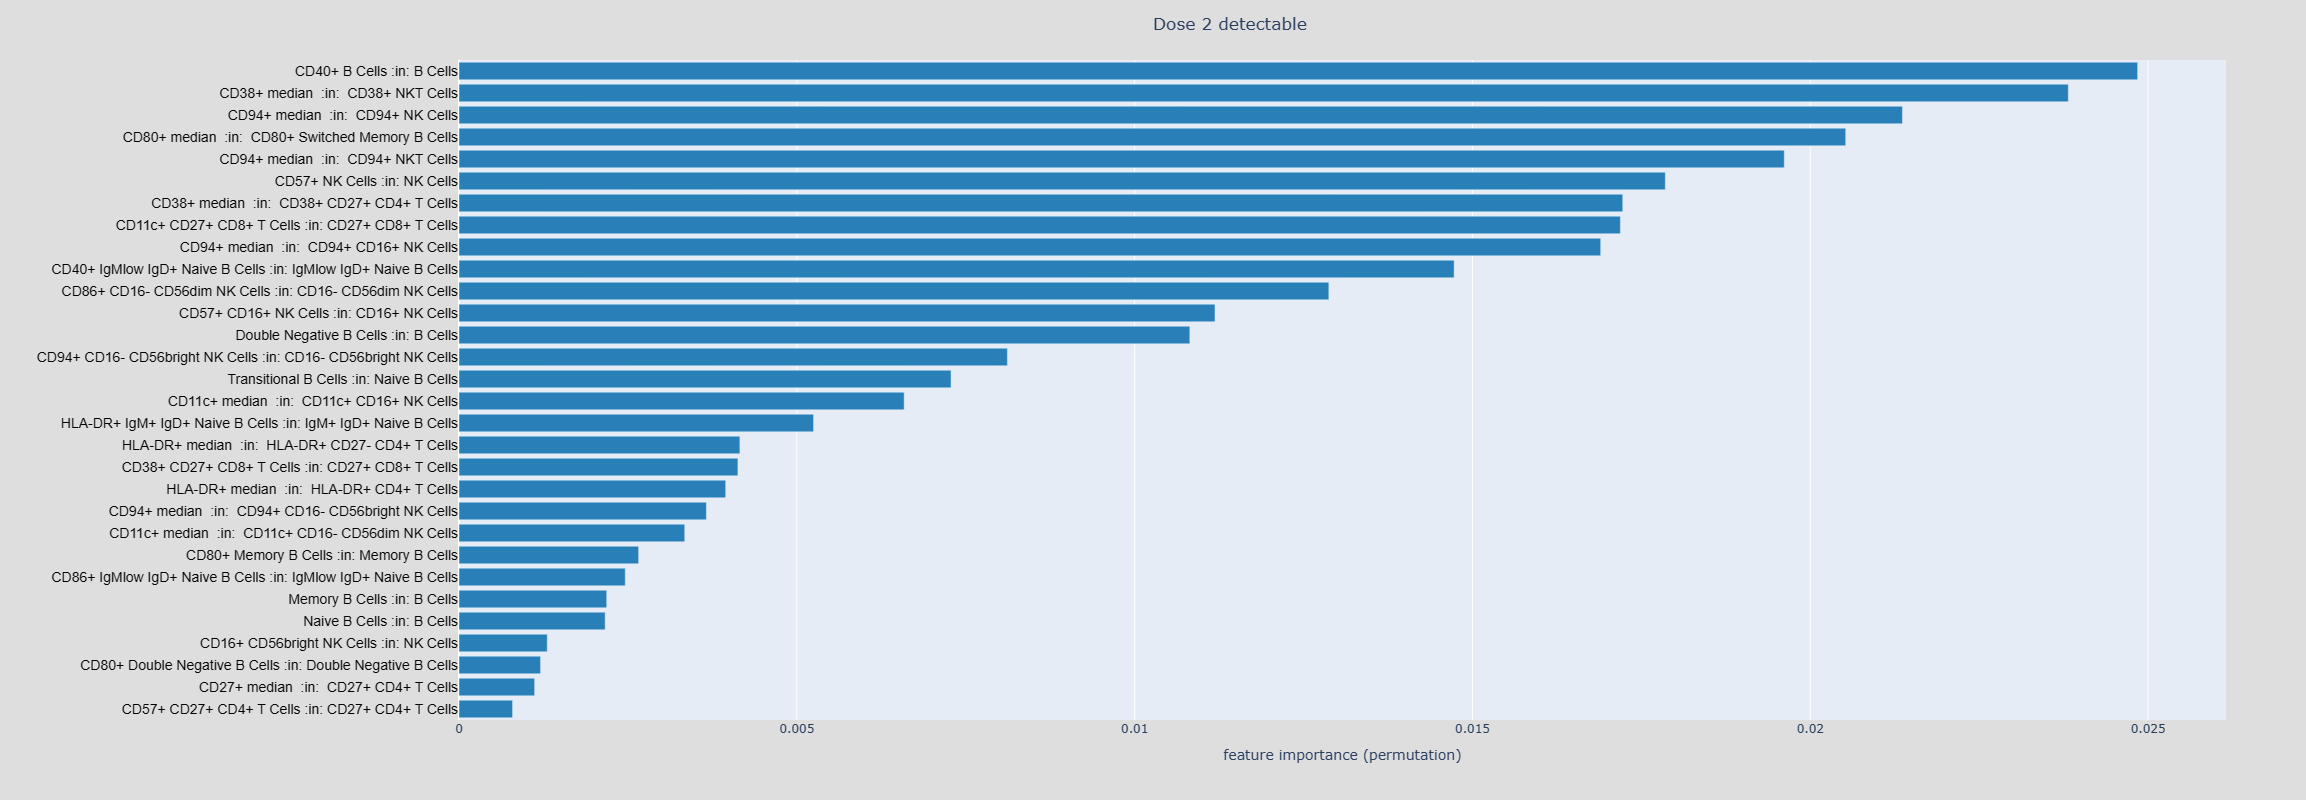

In [33]:
df = data["SVM_RFE_d2_d"]["df"]
df = df.loc[df["var"]!="age",:]
df = df.sort_values(by="impor_mean",ascending=False)
fig1 = px.bar(df.iloc[:30,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig1.update_layout(showlegend=False,height = 800,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 2 detectable")
fig1.layout.title.xanchor = 'left'
fig1.layout.title.x = 0.5
fig1.update_traces(marker_color='rgba(41, 128, 185, 1.0)')
fig1.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig1.layout.paper_bgcolor = 'rgb(222,222,222)'
fig1.update(layout_coloraxis_showscale=False)
#fig1.update_yaxes(ticklabelposition="inside top", title=None)
fig1.write_image("fig_ml_A.svg")
fig1

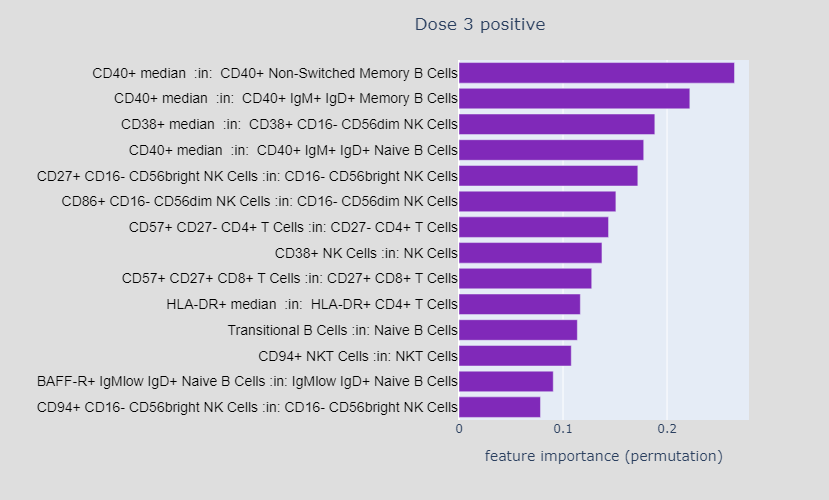

In [34]:
df = data["SVM_RFE_d3_p"]["df"]
df = df.loc[df["var"]!="age",:]
df = df.loc[df["var"]!="tx_time",:]
df = df.loc[df["var"]!="type",:]
df = df.sort_values(by="impor_mean",ascending=False)
fig1 = px.bar(df.iloc[:40,:], x="impor_mean", y="var",orientation='h',labels={"impor_mean": "feature importance (permutation)","var": ""})
fig1.update_layout(showlegend=False,height = 500,yaxis={'categoryorder':'total ascending'},width = 1000,title = "Dose 3 positive")
fig1.layout.title.xanchor = 'left'
fig1.layout.title.x = 0.5
fig1.update_traces(marker_color='rgba( 128,41, 185, 1.0)')
fig1.layout.yaxis.tickfont = dict(size =14, color='black', family='Arial, sans-serif')
fig1.layout.paper_bgcolor = 'rgb(222,222,222)'
fig1.update(layout_coloraxis_showscale=False)
#fig1.update_yaxes(ticklabelposition="inside top", title=None)
fig1.write_image("fig_ml_B.svg")
fig1

### ROC ML

In [27]:
fold = os.getcwd()
file = open(fold + "/data_aux/feature_eval.pkl","rb")
data = pk.load(file)
file.close()

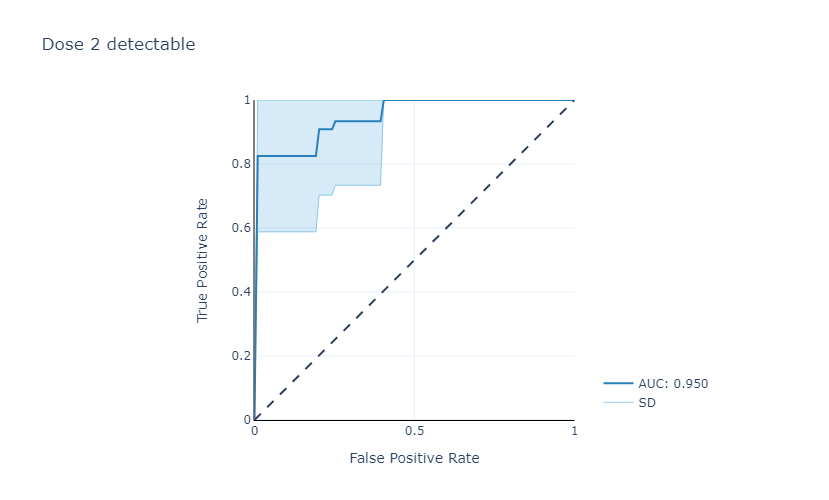

In [28]:
y_true_d2_d  = []
y_true_d3_p  = []
y_score_d2_d = []
y_score_d3_p = []
for i in range(len(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"])):
    y_true_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["y_true"])
    y_true_d3_p.append(data["comp"]["SVM_RFE_d3_p"]["SVM_d3_p"][i]["y_true"])
    y_score_d2_d.append(data["comp"]["SVM_RFE_d2_d"]["SVM_d2_d"][i]["z"])
    y_score_d3_p.append(data["comp"]["SVM_RFE_d3_p"]["SVM_d3_p"][i]["z"])


kind = 'val'
c_line      = 'rgba(52, 152, 219, 0.5)'
c_fill      = 'rgba(52, 152, 219, 0.2)'
c_line_main = 'rgba(41, 128, 185, 1.0)'
c_grid      = 'rgba(189, 195, 199, 0.5)'
#c_annot     = 'rgba(149, 165, 166, 0.5)'
#c_highlight = 'rgba(192, 57, 43, 1.0)'
fpr_mean    = np.linspace(0, 1, 100)
interp_tprs_d2_d = []
interp_tprs_d3_p = []
for i in range(len(y_true_d2_d)):
    fpr_d2_d, tpr_d2_d, thresholds = roc_curve(y_true_d2_d[i], y_score_d2_d[i])
    fpr_d3_p, tpr_d3_p, thresholds = roc_curve(y_true_d3_p[i], y_score_d3_p[i])
    interp_tpr_d2_d    = np.interp(fpr_mean, fpr_d2_d, tpr_d2_d)
    interp_tpr_d3_p    = np.interp(fpr_mean, fpr_d3_p, tpr_d3_p)
    interp_tpr_d2_d[0] = 0.0
    interp_tpr_d3_p[0] = 0.0
    interp_tprs_d2_d.append(interp_tpr_d2_d)
    interp_tprs_d3_p.append(interp_tpr_d3_p)
tpr_mean_d2_d     = np.mean(interp_tprs_d2_d, axis=0)
tpr_mean_d3_p     = np.mean(interp_tprs_d3_p, axis=0)
tpr_mean_d2_d[-1] = 1.0
tpr_mean_d3_p[-1] = 1.0
tpr_std_d2_d      = np.std(interp_tprs_d2_d, axis=0)
tpr_std_d3_p      = np.std(interp_tprs_d3_p, axis=0)
tpr_upper_d2_d    = np.clip(tpr_mean_d2_d+tpr_std_d2_d, 0, 1)
tpr_upper_d3_p    = np.clip(tpr_mean_d3_p+tpr_std_d3_p, 0, 1)
tpr_lower_d2_d    = tpr_mean_d2_d-tpr_std_d2_d
tpr_lower_d3_p    = tpr_mean_d3_p-tpr_std_d3_p

fig3 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d2_d,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d2_d,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d2_d,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.950')
]
)
fig3.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig3.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 2 detectable",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig3.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig3.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig3.write_image("fig_ml_C.svg")
fig3

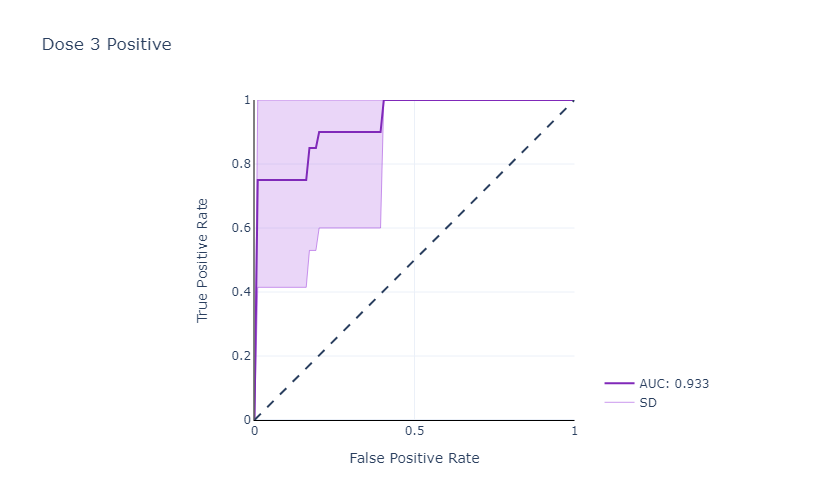

In [29]:
c_line      = 'rgba( 152,52, 219, 0.5)'
c_fill      = 'rgba( 152,52, 219, 0.2)'
c_line_main = 'rgba( 128,41, 185, 1.0)'
c_grid      = 'rgba( 195,189, 199, 0.5)'

fig4 = go.Figure([
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_upper_d3_p,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'SD'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_lower_d3_p,
        fill       = 'tonexty',
        fillcolor  = c_fill,
        line       = dict(color=c_line, width=1),
        hoverinfo  = "skip",
        showlegend = False,
        name       = 'lower'),
    go.Scatter(
        x          = fpr_mean,
        y          = tpr_mean_d3_p,
        line       = dict(color=c_line_main, width=2),
        hoverinfo  = "skip",
        showlegend = True,
        name       = 'AUC: 0.933')
]
)
fig4.add_shape(
    type ='line', 
    line =dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)
fig4.update_layout(
    template    = 'plotly_white', 
    title_x     = 0.5,
    title = "Dose 3 Positive",
    xaxis_title = "False Positive Rate",
    yaxis_title = "True Positive Rate",
    width       = 500,
    height      = 500,
    legend      = dict(
        yanchor="bottom", 
        xanchor="right", 
        x=0.95,
        y=0.01,
    )
)
fig4.update_yaxes(
    range       = [0, 1],
    scaleanchor = "x", 
    scaleratio  = 1,
    linecolor   = 'black')
fig4.update_xaxes(
    range       = [0, 1],
    constrain   = 'domain',
    linecolor   = 'black')
fig4.write_image("fig_ml_D.svg")
fig4

In [30]:
df =data["data"]['[SVM_RFE]']
df.to_csv(fold + "/res/table.csv",index=False)
